# Systemy inspekcji wizualnej  
## Laboratorium  6
Temat: Operacje morfologiczne

Instrukcję opracował: dr inż. Łukasz Jeleń  
  
Wrocław 2022

---

Nazwisko i Imię: Mateusz Śliwiński  
Nr albumu: 253403  
data wykonania ćwiczenia: 05.12.2023  

---

# 1. Narzędzia  
  
  
Na zjęciach korzystamy z pythnona, a jako środowisko pracy mają Państwo do wyboru Google Colab (https://colab.research.google.com) - wersja online, lub Anaconda Navigator (https://www.anaconda.com/) - wymaga instalacji na własnym komputerze. Są to oczywiście tylko propozycje.

# 2. Zadania.
  
## Zadanie 1 - Element strukturalny.
  
Elemnt strukturalny definuje sąsiedztwo piksela, ktróre jest brane pod uwagę podczas wyznaczania operacji morfologicznych. Bazując na definicji operacji morfologicznej oraz rozmiarze i kształcie elemntu strukturalnego możemy odpowiednio modyfikować nasze obrazy.

### a) Ręczne ustawienie elementu strukturalnego  

W tym przypadku sami określimy kwadratowy element strukturalny o rozmiarze $5x5$: `kernel = np.ones((5,5),np.uint8)`.  
  
Proszę o stworzenie elemntów o rozmiarach $3x3$,$5x5$,$7x7$,$1x1$ oraz wyświetlenie ich.

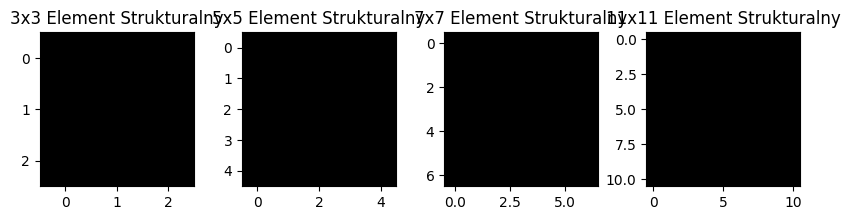

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

kernel_3x3 = np.ones((3, 3), np.uint8)
kernel_5x5 = np.ones((5, 5), np.uint8)
kernel_7x7 = np.ones((7, 7), np.uint8)
kernel_11x11 = np.ones((11, 11), np.uint8)

plt.figure(figsize=(10, 2))

plt.subplot(1, 4, 1)
plt.imshow(kernel_3x3, cmap='gray', interpolation='none')
plt.title('3x3 Element Strukturalny')

plt.subplot(1, 4, 2)
plt.imshow(kernel_5x5, cmap='gray', interpolation='none')
plt.title('5x5 Element Strukturalny')

plt.subplot(1, 4, 3)
plt.imshow(kernel_7x7, cmap='gray', interpolation='none')
plt.title('7x7 Element Strukturalny')

plt.subplot(1, 4, 4)
plt.imshow(kernel_11x11, cmap='gray', interpolation='none')
plt.title('11x11 Element Strukturalny')

plt.show()

### b) getStructuringElement
  
Często zdaża się, że kdratowy element strukturalny nie jest odpowiedni. W celu utworzenia elementu eliptycznego można wykorzystać wbudowaną funkcję OpenCV `cv.getStructuringElement()`, gdzie należy zdefiniować kształt oraz rozmiar jądra. Więcej informacji można przeczytać w dokumentacji [tutaj](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gac2db39b56866583a95a5680313c314ad) i [tutaj](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga7be549266bad7b2e6a04db49827f9f32)


Proszę o stworzenie elemntów typu CROSS i ELLIPSE o rozmiarach $3x3$,$5x5$,$7x7$,$11x11$ oraz wyświetlenie ich.

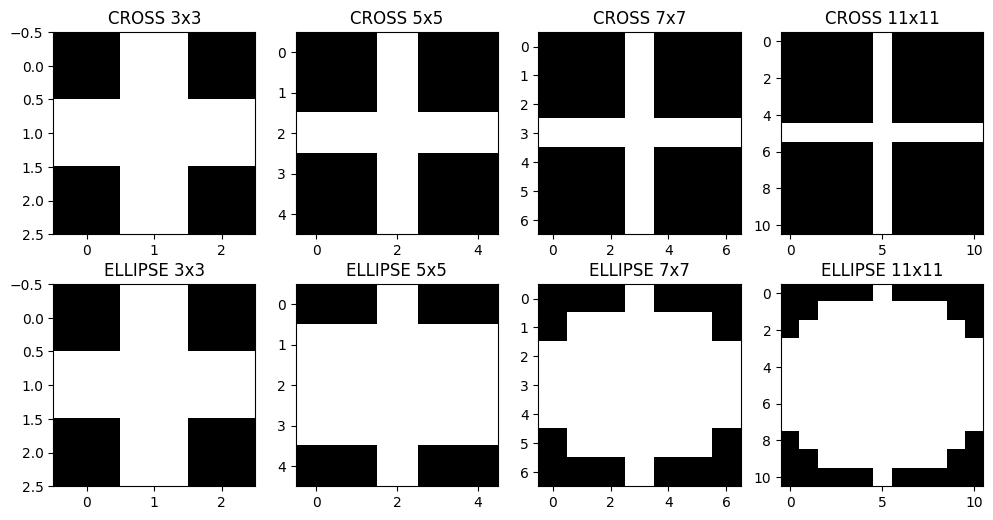

In [ ]:
import cv2
import matplotlib.pyplot as plt

size_3x3 = 3
size_5x5 = 5
size_7x7 = 7
size_11x11 = 11

cross_3x3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (size_3x3, size_3x3))
cross_5x5 = cv2.getStructuringElement(cv2.MORPH_CROSS, (size_5x5, size_5x5))
cross_7x7 = cv2.getStructuringElement(cv2.MORPH_CROSS, (size_7x7, size_7x7))
cross_11x11 = cv2.getStructuringElement(cv2.MORPH_CROSS, (size_11x11, size_11x11))

ellipse_3x3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (size_3x3, size_3x3))
ellipse_5x5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (size_5x5, size_5x5))
ellipse_7x7 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (size_7x7, size_7x7))
ellipse_11x11 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (size_11x11, size_11x11))

plt.figure(figsize=(12, 6))

plt.subplot(2, 4, 1)
plt.imshow(cross_3x3, cmap='gray', interpolation='none')
plt.title('CROSS 3x3')

plt.subplot(2, 4, 2)
plt.imshow(cross_5x5, cmap='gray', interpolation='none')
plt.title('CROSS 5x5')

plt.subplot(2, 4, 3)
plt.imshow(cross_7x7, cmap='gray', interpolation='none')
plt.title('CROSS 7x7')

plt.subplot(2, 4, 4)
plt.imshow(cross_11x11, cmap='gray', interpolation='none')
plt.title('CROSS 11x11')

plt.subplot(2, 4, 5)
plt.imshow(ellipse_3x3, cmap='gray', interpolation='none')
plt.title('ELLIPSE 3x3')

plt.subplot(2, 4, 6)
plt.imshow(ellipse_5x5, cmap='gray', interpolation='none')
plt.title('ELLIPSE 5x5')

plt.subplot(2, 4, 7)
plt.imshow(ellipse_7x7, cmap='gray', interpolation='none')
plt.title('ELLIPSE 7x7')

plt.subplot(2, 4, 8)
plt.imshow(ellipse_11x11, cmap='gray', interpolation='none')
plt.title('ELLIPSE 11x11')

plt.show()

## Zadanie 2 - Podstawowe operacje morfologiczne

W zadaniach należy wykorzystać obraz utworzony na pierwszym laboratorium, bez szumu (obraz z liniami) oraz jeden z obrazów wykonanych w laboratorium).
  
### a) Erozja
  
Dla zadanych obrazów należy wykonać operację erozji dla 3 rodzai elementów strukturalnych oraz rozmiarów $5x5$,$7x7$,$11x11$. Proszę wykonać analizy dla obrazów binarnych oraz monochromatycznych.

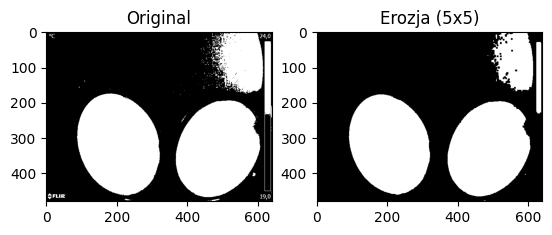

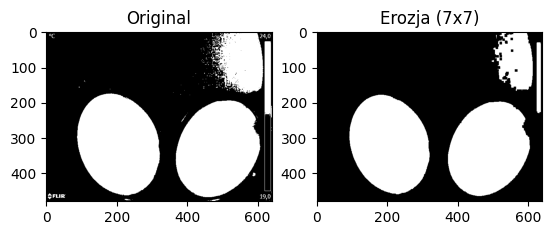

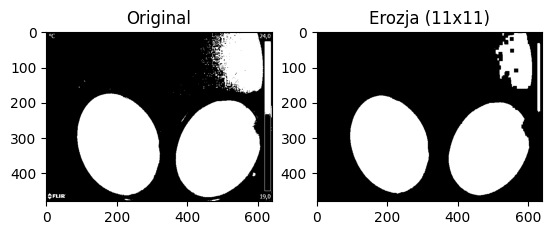

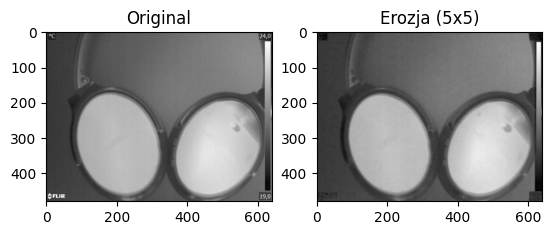

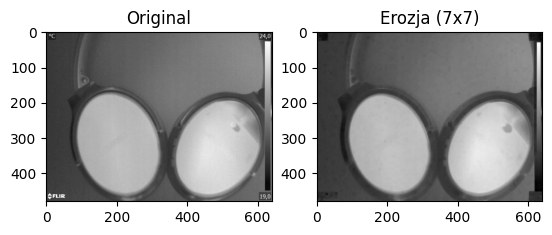

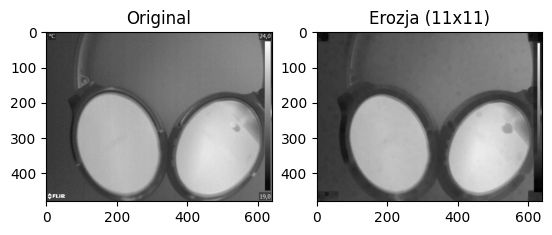

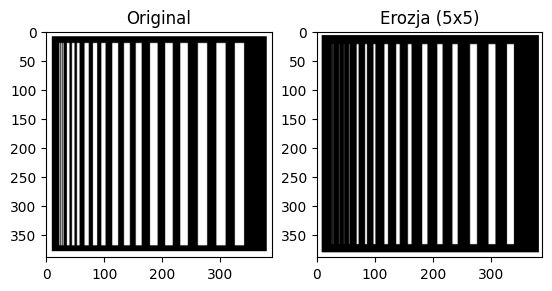

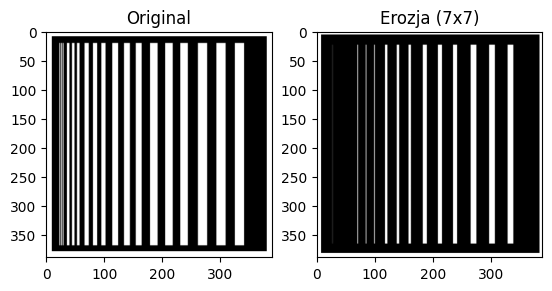

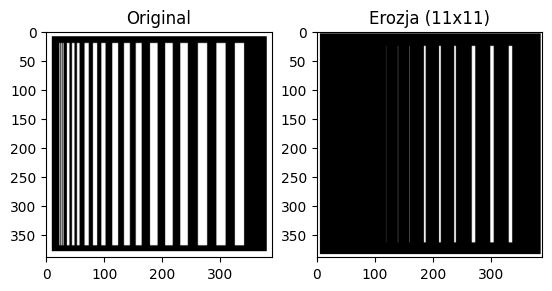

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img_binary = cv2.imread('10.jpg', cv2.IMREAD_GRAYSCALE)
img_binary = cv2.threshold(img_binary, 128, 255, cv2.THRESH_BINARY)[1]
img_monochrome = cv2.imread('10.jpg', cv2.IMREAD_GRAYSCALE)

img_lab1 = cv2.imread('1.png', cv2.IMREAD_GRAYSCALE)


kernel_5x5 = np.ones((5, 5), np.uint8)
kernel_7x7 = np.ones((7, 7), np.uint8)
kernel_11x11 = np.ones((11, 11), np.uint8)

def apply_erosion(image, kernel, title):
    result = cv2.erode(image, kernel, iterations=1)

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original')

    plt.subplot(1, 2, 2)
    plt.imshow(result, cmap='gray')
    plt.title(title)

    plt.show()

apply_erosion(img_binary, kernel_5x5, 'Erozja (5x5)')
apply_erosion(img_binary, kernel_7x7, 'Erozja (7x7)')
apply_erosion(img_binary, kernel_11x11, 'Erozja (11x11)')

apply_erosion(img_monochrome, kernel_5x5, 'Erozja (5x5)')
apply_erosion(img_monochrome, kernel_7x7, 'Erozja (7x7)')
apply_erosion(img_monochrome, kernel_11x11, 'Erozja (11x11)')

apply_erosion(img_lab1, kernel_5x5, 'Erozja (5x5)')
apply_erosion(img_lab1, kernel_7x7, 'Erozja (7x7)')
apply_erosion(img_lab1, kernel_11x11, 'Erozja (11x11)')

### b) Dylatacja
  
Dla zadanych obrazów należy wykonać operację dylatacji dla 3 rodzai elementów strukturalnych oraz rozmiarów $5x5$,$7x7$,$11x11$. Proszę wykonać analizy dla obrazów binarnych oraz monochromatycznych.

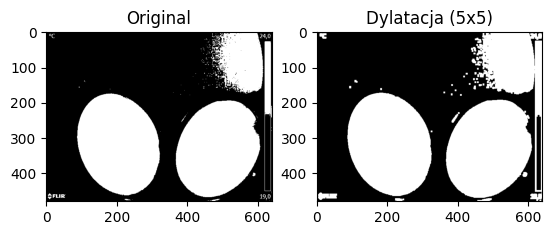

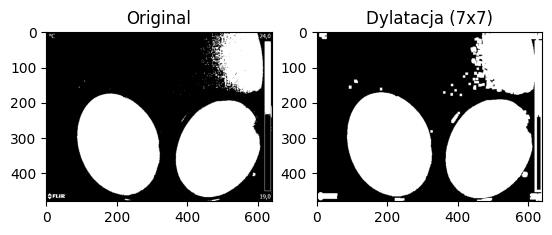

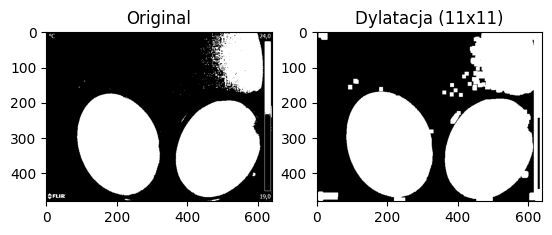

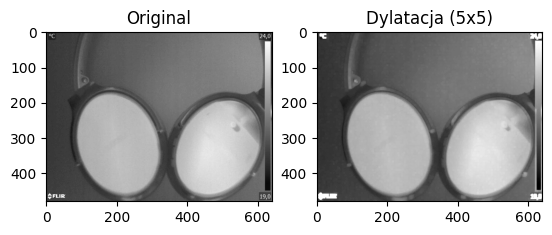

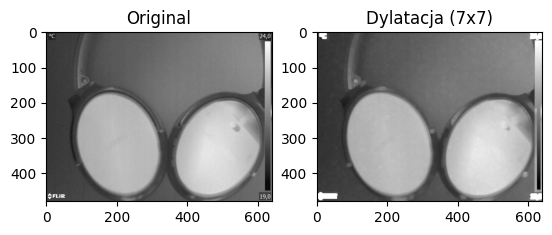

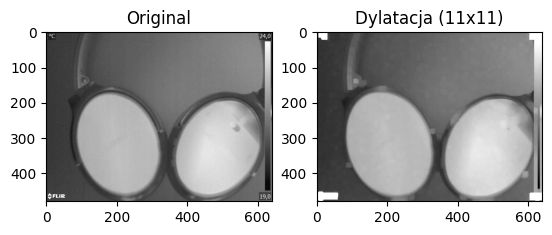

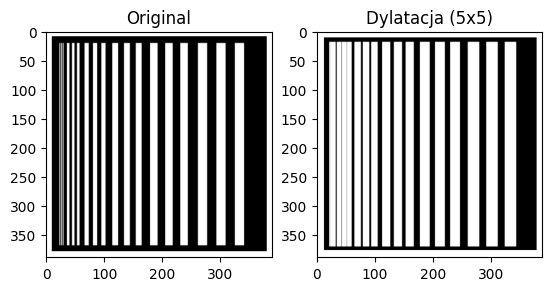

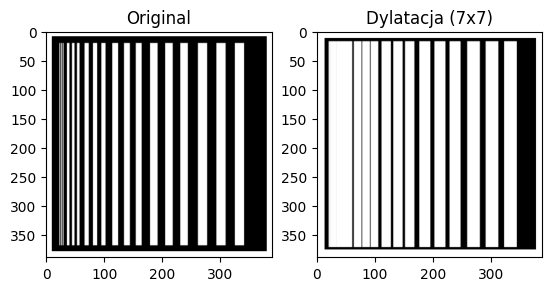

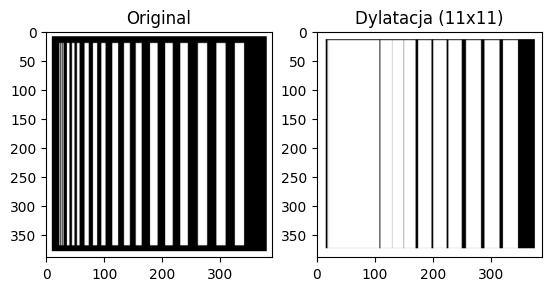

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

kernel_5x5 = np.ones((5, 5), np.uint8)
kernel_7x7 = np.ones((7, 7), np.uint8)
kernel_11x11 = np.ones((11, 11), np.uint8)

def apply_dilation(image, kernel, title):
    result = cv2.dilate(image, kernel, iterations=1)

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original')

    plt.subplot(1, 2, 2)
    plt.imshow(result, cmap='gray')
    plt.title(title)

    plt.show()

apply_dilation(img_binary, kernel_5x5, 'Dylatacja (5x5)')
apply_dilation(img_binary, kernel_7x7, 'Dylatacja (7x7)')
apply_dilation(img_binary, kernel_11x11, 'Dylatacja (11x11)')

apply_dilation(img_monochrome, kernel_5x5, 'Dylatacja (5x5)')
apply_dilation(img_monochrome, kernel_7x7, 'Dylatacja (7x7)')
apply_dilation(img_monochrome, kernel_11x11, 'Dylatacja (11x11)')

apply_dilation(img_lab1, kernel_5x5, 'Dylatacja (5x5)')
apply_dilation(img_lab1, kernel_7x7, 'Dylatacja (7x7)')
apply_dilation(img_lab1, kernel_11x11, 'Dylatacja (11x11)')



### c) Otwarcie
  
Dla zadanych obrazów należy wykonać operację otwarcia dla 3 rodzai elementów strukturalnych oraz rozmiarów $5x5$,$7x7$,$11x11$. Proszę wykonać analizy dla obrazów binarnych oraz monochromatycznych.

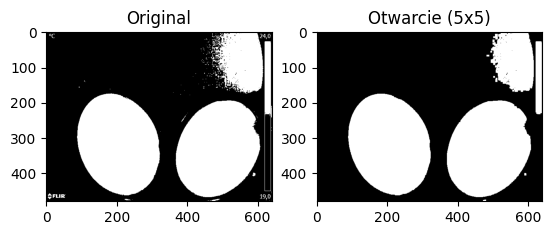

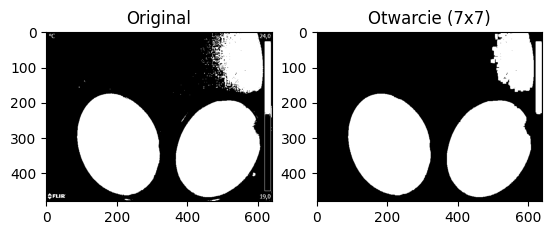

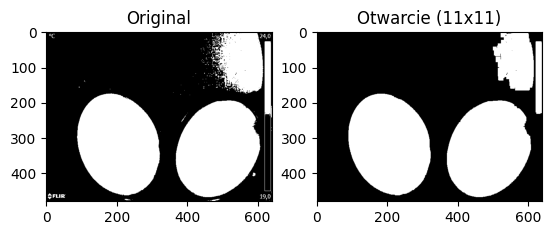

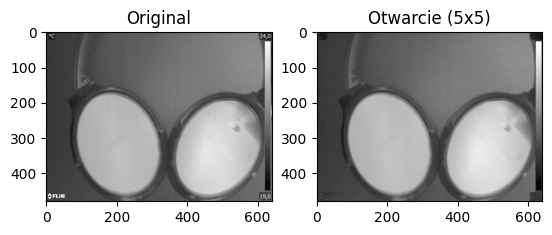

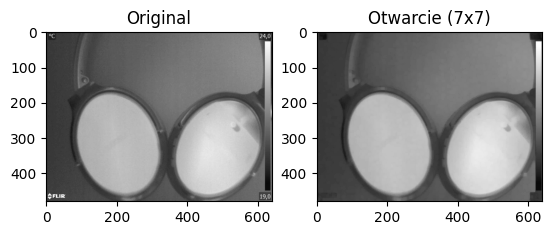

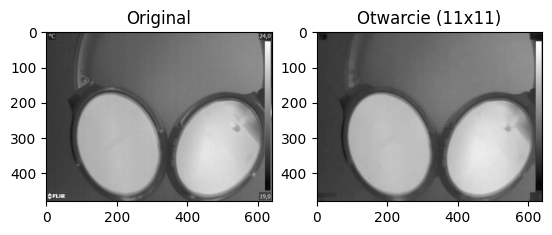

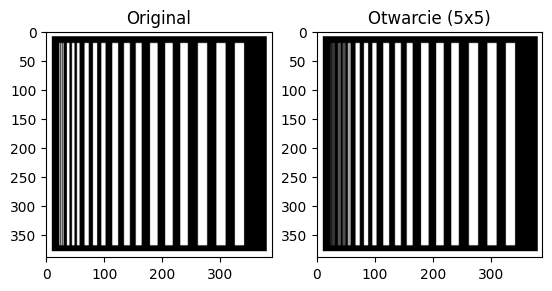

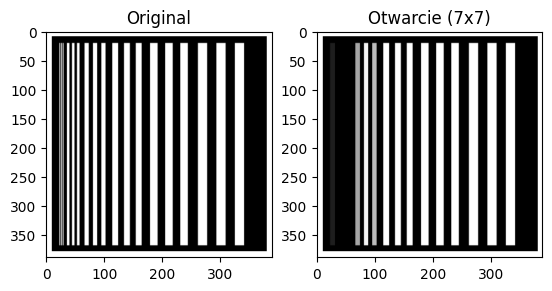

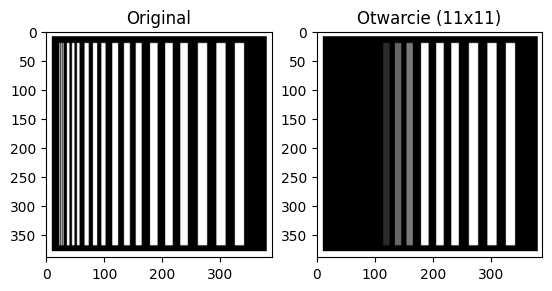

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

kernel_5x5 = np.ones((5, 5), np.uint8)
kernel_7x7 = np.ones((7, 7), np.uint8)
kernel_11x11 = np.ones((11, 11), np.uint8)

def apply_opening(image, kernel, title):
    result = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original')

    plt.subplot(1, 2, 2)
    plt.imshow(result, cmap='gray')
    plt.title(title)

    plt.show()

apply_opening(img_binary, kernel_5x5, 'Otwarcie (5x5)')
apply_opening(img_binary, kernel_7x7, 'Otwarcie (7x7)')
apply_opening(img_binary, kernel_11x11, 'Otwarcie (11x11)')

apply_opening(img_monochrome, kernel_5x5, 'Otwarcie (5x5)')
apply_opening(img_monochrome, kernel_7x7, 'Otwarcie (7x7)')
apply_opening(img_monochrome, kernel_11x11, 'Otwarcie (11x11)')

apply_opening(img_lab1, kernel_5x5, 'Otwarcie (5x5)')
apply_opening(img_lab1, kernel_7x7, 'Otwarcie (7x7)')
apply_opening(img_lab1, kernel_11x11, 'Otwarcie (11x11)')

### c) Zamknięcie  
  
Dla zadanych obrazów należy wykonać operację zamknięcia dla 3 rodzai elementów strukturalnych oraz rozmiarów $5x5$,$7x7$,$11x11$. Proszę wykonać analizy dla obrazów binarnych oraz monochromatycznych.

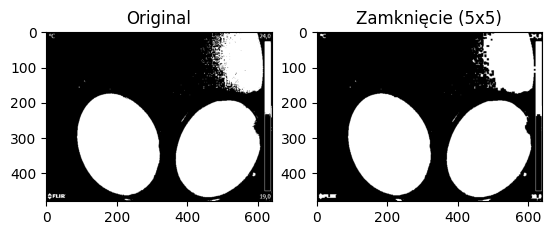

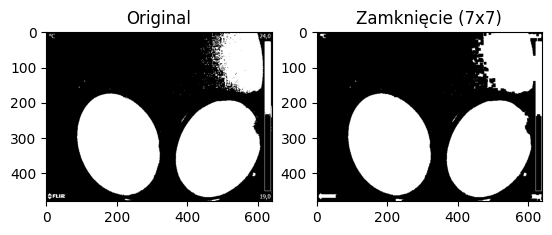

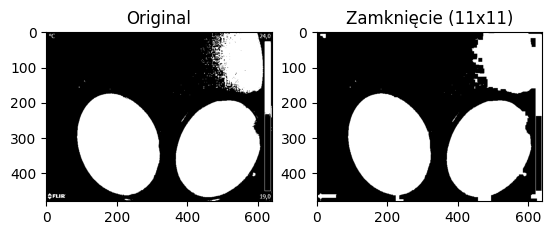

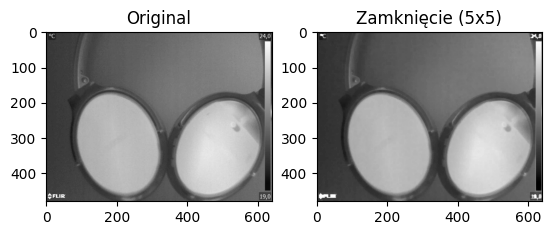

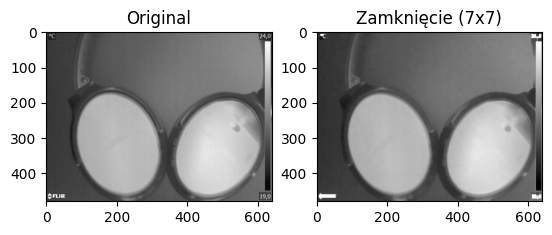

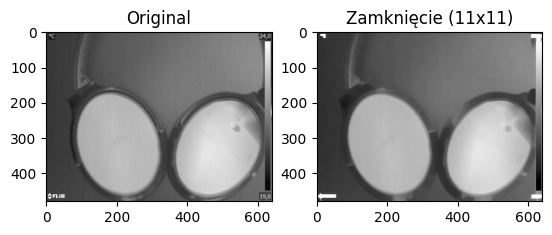

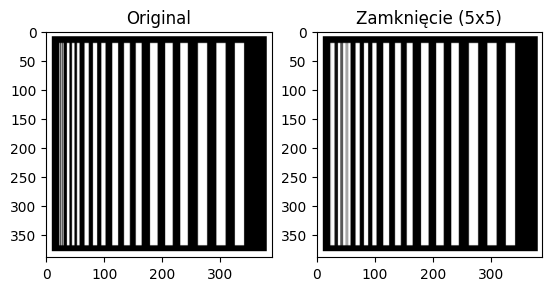

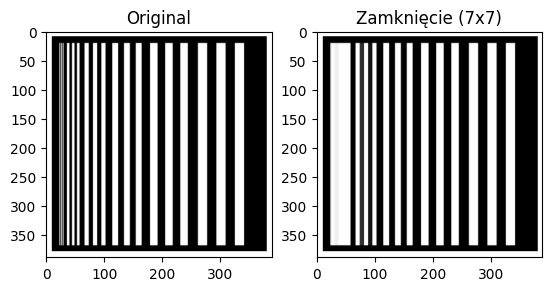

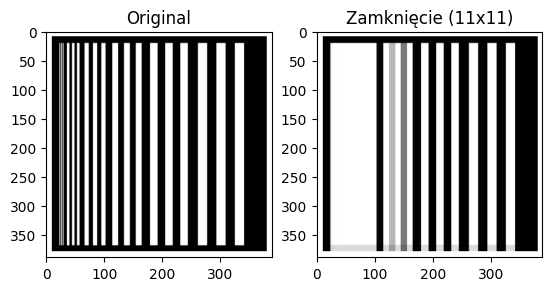

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

kernel_5x5 = np.ones((5, 5), np.uint8)
kernel_7x7 = np.ones((7, 7), np.uint8)
kernel_11x11 = np.ones((11, 11), np.uint8)

def apply_closing(image, kernel, title):
    result = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original')

    plt.subplot(1, 2, 2)
    plt.imshow(result, cmap='gray')
    plt.title(title)

    plt.show()

apply_closing(img_binary, kernel_5x5, 'Zamknięcie (5x5)')
apply_closing(img_binary, kernel_7x7, 'Zamknięcie (7x7)')
apply_closing(img_binary, kernel_11x11, 'Zamknięcie (11x11)')

apply_closing(img_monochrome, kernel_5x5, 'Zamknięcie (5x5)')
apply_closing(img_monochrome, kernel_7x7, 'Zamknięcie (7x7)')
apply_closing(img_monochrome, kernel_11x11, 'Zamknięcie (11x11)')

apply_closing(img_lab1, kernel_5x5, 'Zamknięcie (5x5)')
apply_closing(img_lab1, kernel_7x7, 'Zamknięcie (7x7)')
apply_closing(img_lab1, kernel_11x11, 'Zamknięcie (11x11)')

## Zadanie 3 - Pozostałe operacje morfologiczne

W zadaniach należy wykorzystać obraz utworzony na pierwszym laboratorium, bez szumu (obraz z liniami) oraz jeden z obrazów wykonanych w laboratorium).

### a) Gradient morfologiczny
  
Jest to różnica między diatacją i erozją, a wynikiem będzie obwiednia obiektu.
  
Dla zadanych obrazów należy wykonać operację gradientu morfologicznego dla 3 rodzai elementów strukturalnych oraz rozmiarów $5x5$,$7x7$,$11x11$. Można się zapoznać z dokumentacją [polecenia.](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga67493776e3ad1a3df63883829375201f) Proszę wykonać analizy dla obrazów binarnych oraz monochromatycznych.

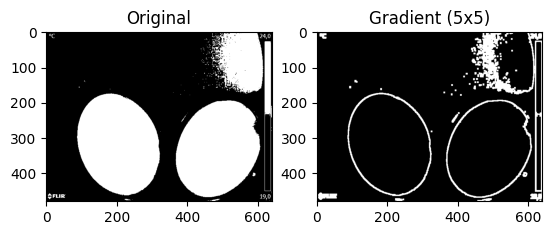

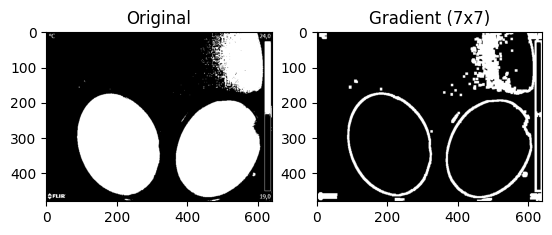

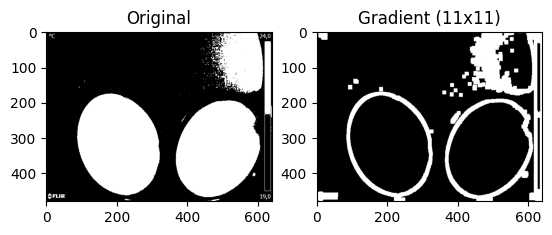

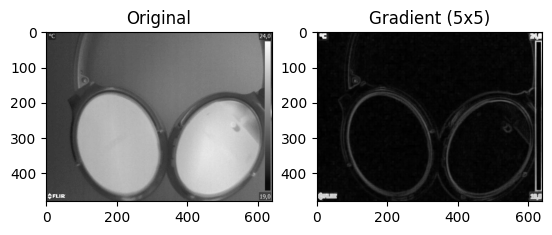

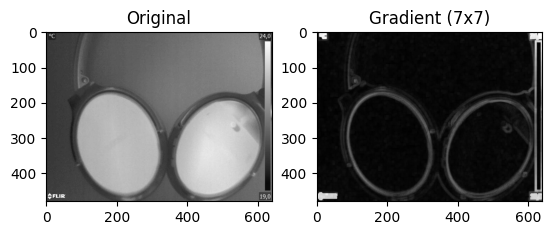

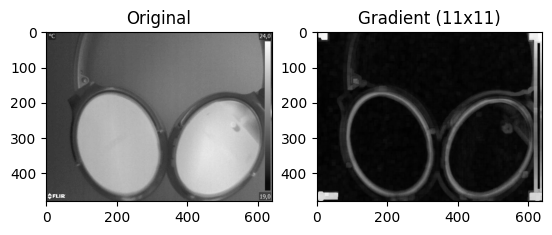

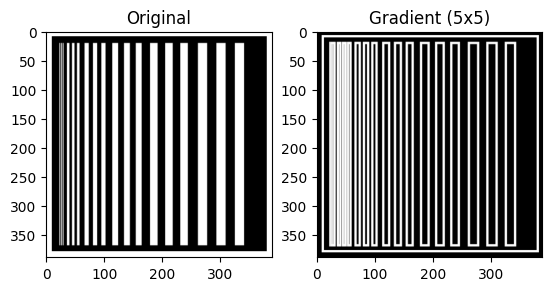

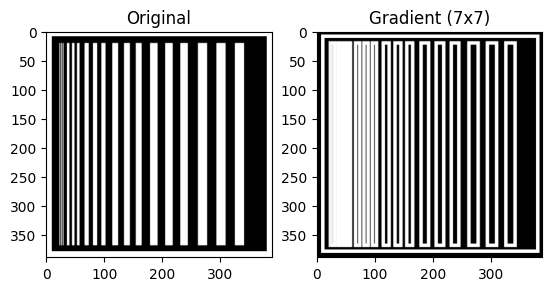

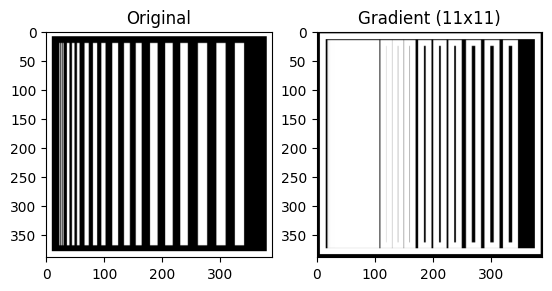

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

kernel_5x5 = np.ones((5, 5), np.uint8)
kernel_7x7 = np.ones((7, 7), np.uint8)
kernel_11x11 = np.ones((11, 11), np.uint8)

def apply_morphological_gradient(image, kernel, title):
    gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original')

    plt.subplot(1, 2, 2)
    plt.imshow(gradient, cmap='gray')
    plt.title(title)

    plt.show()

apply_morphological_gradient(img_binary, kernel_5x5, 'Gradient (5x5)')
apply_morphological_gradient(img_binary, kernel_7x7, 'Gradient (7x7)')
apply_morphological_gradient(img_binary, kernel_11x11, 'Gradient (11x11)')

apply_morphological_gradient(img_monochrome, kernel_5x5, 'Gradient (5x5)')
apply_morphological_gradient(img_monochrome, kernel_7x7, 'Gradient (7x7)')
apply_morphological_gradient(img_monochrome, kernel_11x11, 'Gradient (11x11)')

apply_morphological_gradient(img_lab1, kernel_5x5, 'Gradient (5x5)')
apply_morphological_gradient(img_lab1, kernel_7x7, 'Gradient (7x7)')
apply_morphological_gradient(img_lab1, kernel_11x11, 'Gradient (11x11)')


### b) Top Hat
  
Operacja Top Hat jest różnicą między obrazem wejściowym a wynikiem operacji Otwracia.
  
Dla zadanych obrazów należy wykonać operację Top Hat dla 3 rodzai elementów strukturalnych oraz rozmiarów $5x5$,$7x7$,$11x11$. Proszę wykonać analizy dla obrazów binarnych oraz monochromatycznych.

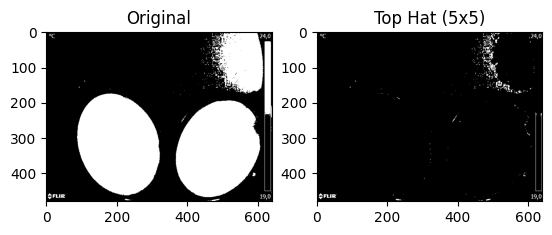

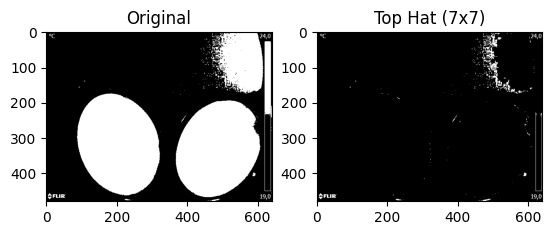

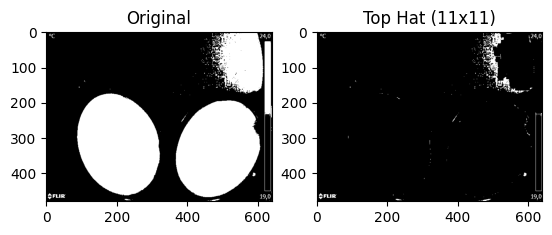

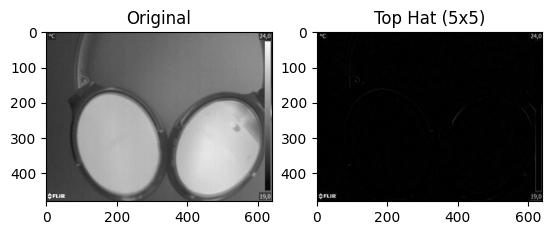

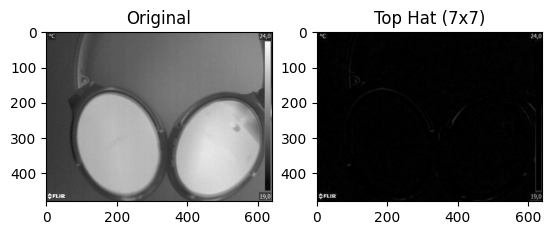

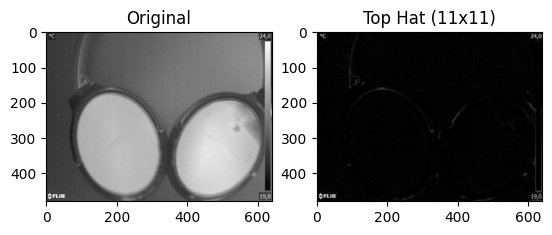

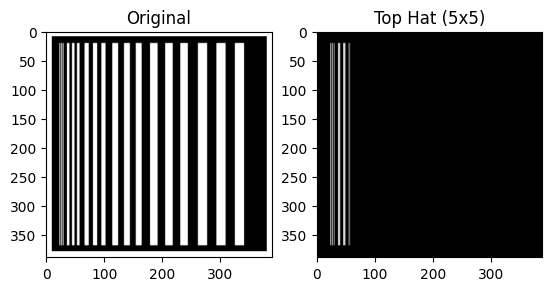

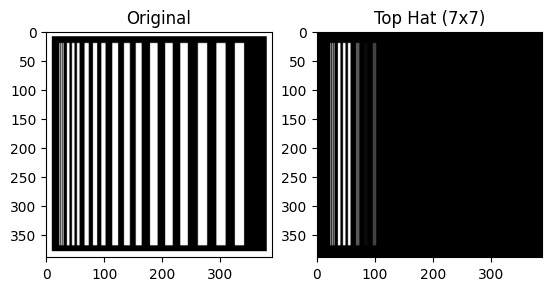

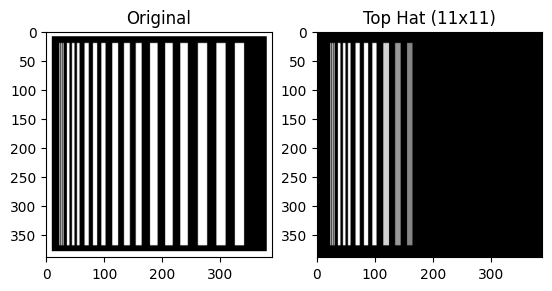

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

kernel_5x5 = np.ones((5, 5), np.uint8)
kernel_7x7 = np.ones((7, 7), np.uint8)
kernel_11x11 = np.ones((11, 11), np.uint8)

def apply_top_hat(image, kernel, title):
    top_hat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original')

    plt.subplot(1, 2, 2)
    plt.imshow(top_hat, cmap='gray')
    plt.title(title)

    plt.show()

apply_top_hat(img_binary, kernel_5x5, 'Top Hat (5x5)')
apply_top_hat(img_binary, kernel_7x7, 'Top Hat (7x7)')
apply_top_hat(img_binary, kernel_11x11, 'Top Hat (11x11)')

apply_top_hat(img_monochrome, kernel_5x5, 'Top Hat (5x5)')
apply_top_hat(img_monochrome, kernel_7x7, 'Top Hat (7x7)')
apply_top_hat(img_monochrome, kernel_11x11, 'Top Hat (11x11)')

apply_top_hat(img_lab1, kernel_5x5, 'Top Hat (5x5)')
apply_top_hat(img_lab1, kernel_7x7, 'Top Hat (7x7)')
apply_top_hat(img_lab1, kernel_11x11, 'Top Hat (11x11)')

### c) Balck Hat

Operacja Black Hat jest różnicą między wynikiem operacji zamknięcia, a obrazem wejściowym.
  
Dla zadanych obrazów należy wykonać operację Balck Hat dla 3 rodzai elementów strukturalnych oraz rozmiarów $5x5$,$7x7$,$11x11$. Proszę wykonać analizy dla obrazów binarnych oraz monochromatycznych.

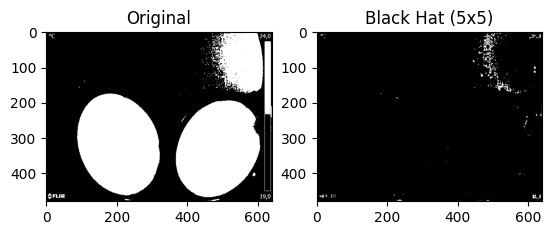

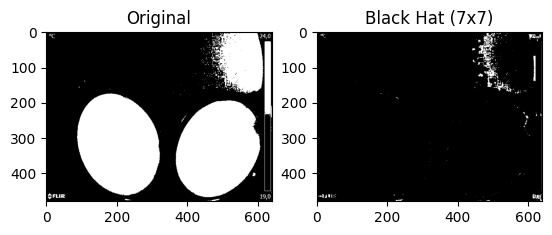

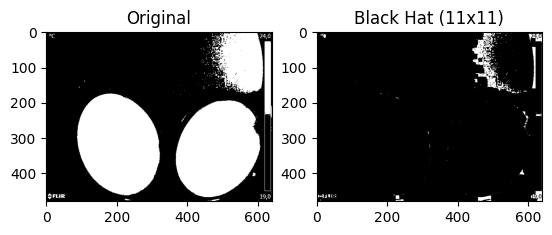

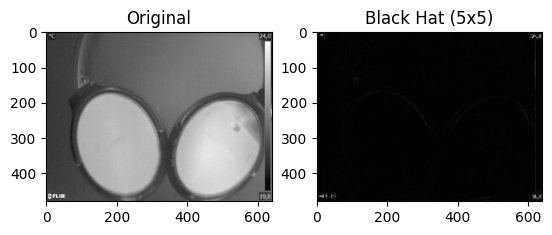

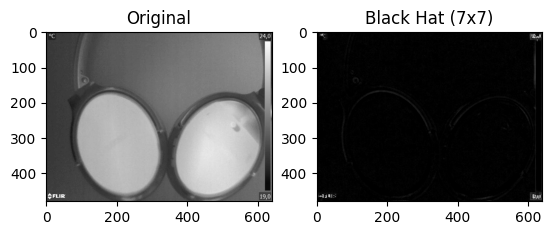

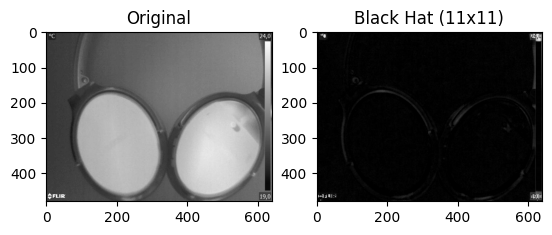

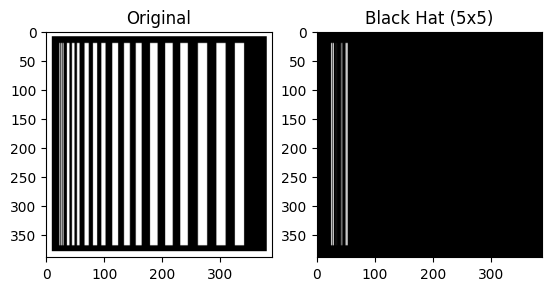

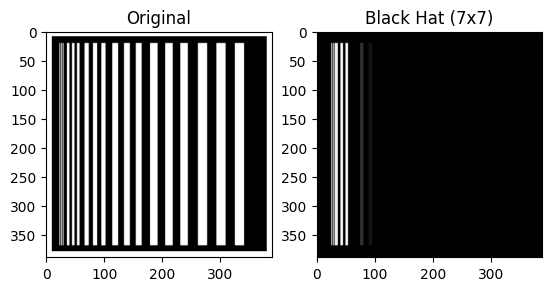

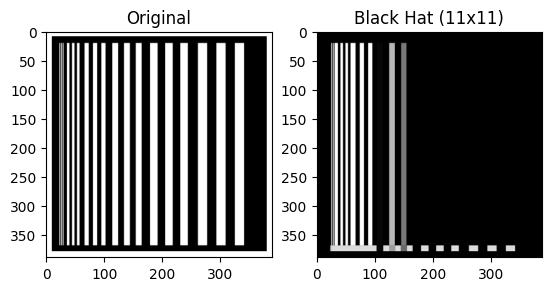

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

kernel_5x5 = np.ones((5, 5), np.uint8)
kernel_7x7 = np.ones((7, 7), np.uint8)
kernel_11x11 = np.ones((11, 11), np.uint8)

def apply_black_hat(image, kernel, title):
    black_hat = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel)

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original')

    plt.subplot(1, 2, 2)
    plt.imshow(black_hat, cmap='gray')
    plt.title(title)

    plt.show()

apply_black_hat(img_binary, kernel_5x5, 'Black Hat (5x5)')
apply_black_hat(img_binary, kernel_7x7, 'Black Hat (7x7)')
apply_black_hat(img_binary, kernel_11x11, 'Black Hat (11x11)')

apply_black_hat(img_monochrome, kernel_5x5, 'Black Hat (5x5)')
apply_black_hat(img_monochrome, kernel_7x7, 'Black Hat (7x7)')
apply_black_hat(img_monochrome, kernel_11x11, 'Black Hat (11x11)')

apply_black_hat(img_lab1, kernel_5x5, 'Black Hat (5x5)')
apply_black_hat(img_lab1, kernel_7x7, 'Black Hat (7x7)')
apply_black_hat(img_lab1, kernel_11x11, 'Black Hat (11x11)')